# MSDS670_X40_Data Visualization
## 2026 Spring 8 Week 1
## Week 5 Assignment 

---

### Author: Ilse Severance

In [11]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Load data
df = pd.read_csv("MSDS670_X40_Data Visualization_AssignmentWk5 - Ilse Severance - Gaming and mental health.csv")
df.head()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate


In [13]:
#Looking if there are missing values
print(df.isnull().sum())

record_id                             0
age                                   0
gender                                0
daily_gaming_hours                    0
game_genre                            0
primary_game                          0
gaming_platform                       0
sleep_hours                           0
sleep_quality                         0
sleep_disruption_frequency            0
academic_work_performance             0
grades_gpa                          246
work_productivity_score             326
mood_state                            0
mood_swing_frequency                  0
withdrawal_symptoms                   0
loss_of_other_interests               0
continued_despite_problems            0
eye_strain                            0
back_neck_pain                        0
weight_change_kg                      0
exercise_hours_weekly                 0
social_isolation_score                0
face_to_face_social_hours_weekly      0
monthly_game_spending_usd             0


In [14]:
#Converting columns to numeric, coercing errors to NaN
df["monthly_game_spending_usd"] = pd.to_numeric(df["monthly_game_spending_usd"], errors="coerce")

#Filtering out rows where monthly game spending is zero
spending_df = df[df["monthly_game_spending_usd"] > 0]

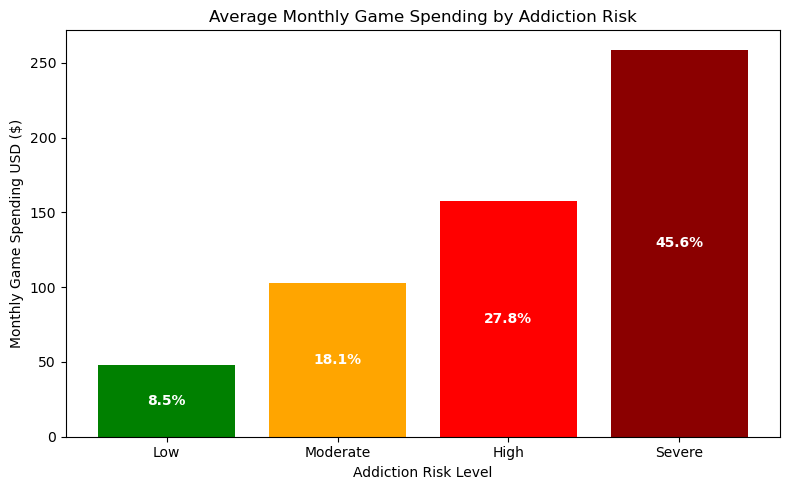

In [15]:
#Computing average spending
avg_spending = spending_df.groupby("gaming_addiction_risk_level")["monthly_game_spending_usd"].mean()

#Sorting by value for better visual order
avg_spending_sorted = avg_spending.sort_values()

#Adding colors for the risk levels
colors = ["green", "orange", "red", "darkred"]

#Creating the bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(avg_spending_sorted.index, avg_spending_sorted.values, color=colors)

#Calculating total for percentage calculation
total = avg_spending_sorted.sum()

#Annotate each bar with percentage
for bar, val in zip(bars, avg_spending_sorted.values): ax.text(bar.get_x() + bar.get_width() / 2, val / 2, f"{val/total*100:.1f}%", ha="center", va="center", fontsize=10, color="white", fontweight="bold")

#Adding labels and title
ax.set_title("Average Monthly Game Spending by Addiction Risk")
ax.set_ylabel("Monthly Game Spending USD ($)")
ax.set_xlabel("Addiction Risk Level")
plt.tight_layout()
plt.show()


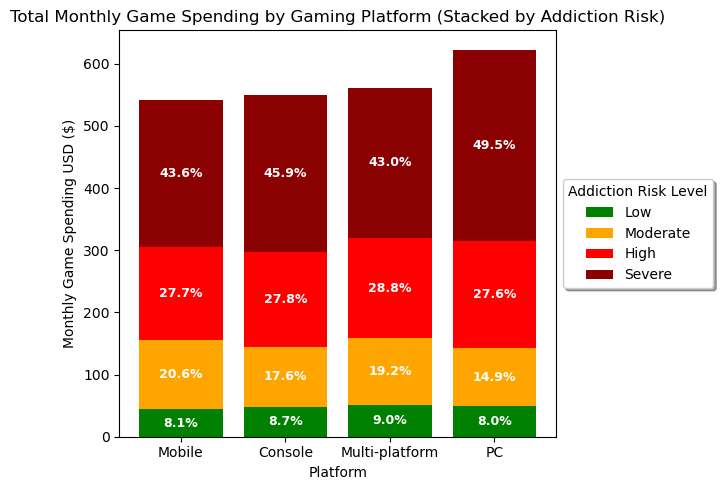

In [16]:
#Computing average spending by platform and addiction risk
platform_risk_avg = spending_df.groupby(["gaming_platform", "gaming_addiction_risk_level"])["monthly_game_spending_usd"].mean().unstack(fill_value=0)

#Defining risk levels in order and colors
risk_order = ["Low", "Moderate", "High", "Severe"]
colors = {"Low": "green", "Moderate": "orange", "High": "red", "Severe": "darkred"}

#Ensuring columns are in the specified order
platform_risk_avg = platform_risk_avg.reindex(columns=risk_order, fill_value=0)

#Sorting platforms by total average spending, creating a helper column for sorting
platform_risk_avg["total"] = platform_risk_avg.sum(axis=1)
platform_risk_avg = platform_risk_avg.sort_values("total")
platform_risk_avg = platform_risk_avg.drop(columns="total") 

#Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(8, 5))

bottom = pd.Series(0, index=platform_risk_avg.index)
for risk_level in risk_order:
    values = platform_risk_avg[risk_level]
    bars = ax.bar(platform_risk_avg.index, values, bottom=bottom, color=colors[risk_level], label=risk_level)
    
    #Annotate each segment with percentage of total for that platform
    for bar, val, btm, platform in zip(bars, values, bottom, platform_risk_avg.index):
        total = platform_risk_avg.loc[platform].sum()
        if val > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, btm + val / 2, f"{val/total*100:.1f}%", ha="center", va="center", fontsize=9, color="white", fontweight="bold")
    bottom += values

#Adding labels and title
ax.set_title("Total Monthly Game Spending by Gaming Platform (Stacked by Addiction Risk)")
ax.set_ylabel("Monthly Game Spending USD ($)")
ax.set_xlabel("Platform")

#Moving legend outside the plot for better visibility
ax.legend(title="Addiction Risk Level", loc="center left", bbox_to_anchor=(1, 0.5), frameon=True, shadow=True, fancybox=True)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


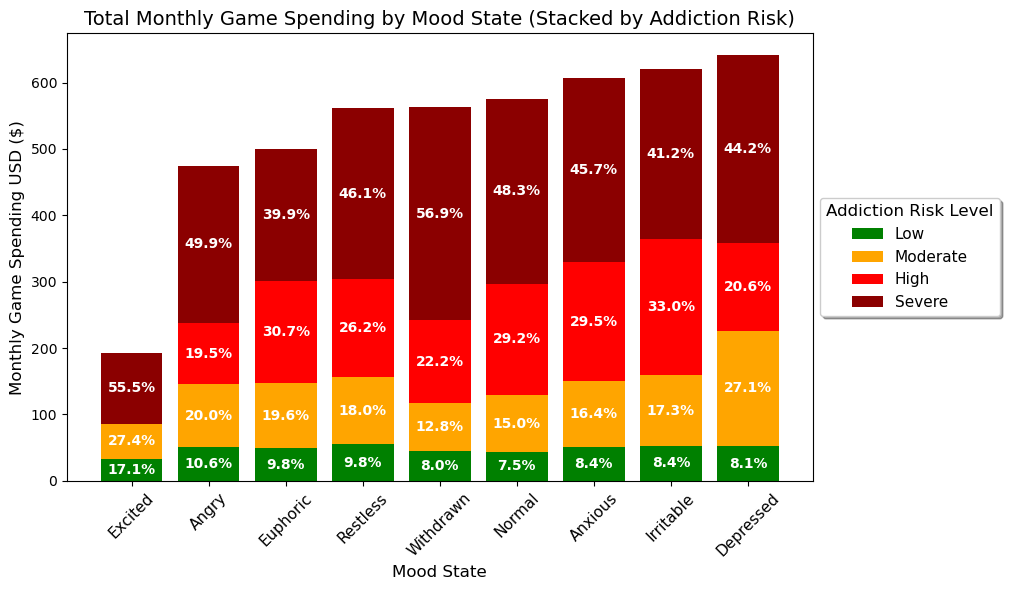

In [17]:
#Computing average spending by mood state and addiction risk
mood_risk_avg = spending_df.groupby(["mood_state", "gaming_addiction_risk_level"])["monthly_game_spending_usd"].mean().unstack(fill_value=0)

#Ensuring columns are in the specified order
mood_risk_avg = mood_risk_avg.reindex(columns=risk_order, fill_value=0)

#Computing total spending per mood and sort by that, creating a helper column for sorting
mood_risk_avg["total_spending"] = mood_risk_avg.sum(axis=1)
mood_risk_avg = mood_risk_avg.sort_values("total_spending")  
mood_risk_avg = mood_risk_avg.drop(columns="total_spending") 

#Creating the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bottom = pd.Series(0, index=mood_risk_avg.index)
for risk_level in risk_order:
    values = mood_risk_avg[risk_level]
    bars = ax.bar(mood_risk_avg.index, values, bottom=bottom, color=colors[risk_level], label=risk_level)
    
    # Annotate each segment with percentage of that mood total
    for bar, val, btm, mood in zip(bars, values, bottom, mood_risk_avg.index):
        total = mood_risk_avg.loc[mood].sum()
        if val > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, btm + val / 2, f"{val/total*100:.1f}%", ha="center", va="center", fontsize=10, color="white", fontweight="bold")
    bottom += values

#Adding labels and title
ax.set_title("Total Monthly Game Spending by Mood State (Stacked by Addiction Risk)", fontsize=14)
ax.set_ylabel("Monthly Game Spending USD ($)", fontsize=12)
ax.set_xlabel("Mood State", fontsize=12)
ax.set_xticklabels(mood_risk_avg.index, rotation=45, fontsize=11)

#Moving the legend box outside the plot for better visibility
ax.legend(title="Addiction Risk Level", loc="center left", bbox_to_anchor=(1, 0.5), frameon=True, shadow=True, fancybox=True, fontsize=11, title_fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


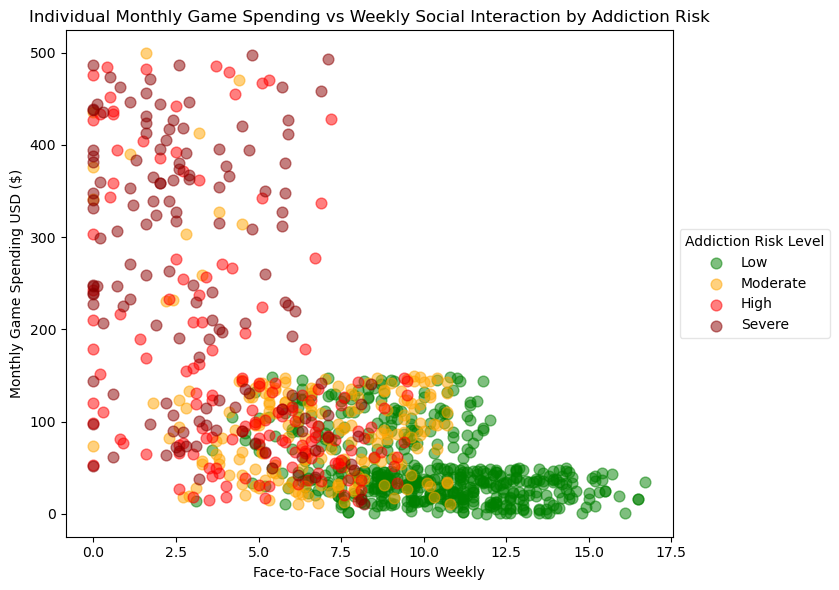

In [18]:
#Defining spending_social to filter out rows with NaN values
spending_social = spending_df[spending_df["face_to_face_social_hours_weekly"].notna()]

#Creating a scatter plot 
fig, ax = plt.subplots(figsize=(10, 6))

#Ploting each risk level
for risk in risk_order:
    subset = spending_social[spending_social["gaming_addiction_risk_level"] == risk]
    ax.scatter(subset["face_to_face_social_hours_weekly"], subset["monthly_game_spending_usd"], label=risk, alpha=0.5, c=colors[risk], s=60)

#Adding labels and title
ax.set_xlabel("Face-to-Face Social Hours Weekly")
ax.set_ylabel("Monthly Game Spending USD ($)")
ax.set_title("Individual Monthly Game Spending vs Weekly Social Interaction by Addiction Risk")
#Creating a legend box outside the plot
ax.legend(title="Addiction Risk Level", loc="center left", bbox_to_anchor=(1, 0.5), frameon=True, framealpha=0.5)
ax.grid(False)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


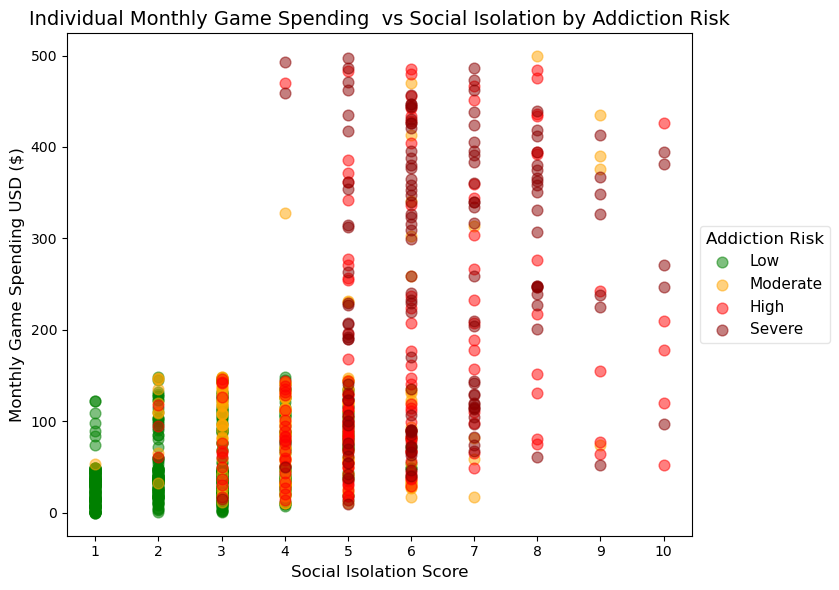

In [19]:
#Removing NaN values
spending_isolation = spending_df[spending_df["social_isolation_score"].notna()]

#Creating a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

#Adding each risk level
for risk in risk_order:
    subset = spending_isolation[spending_isolation["gaming_addiction_risk_level"] == risk]
    ax.scatter(subset["social_isolation_score"], subset["monthly_game_spending_usd"], label=risk, alpha=0.5, c=colors[risk], s=60)

# Labels and title
ax.set_xlabel("Social Isolation Score", fontsize=12)
ax.set_ylabel("Monthly Game Spending USD ($)", fontsize=12)
ax.set_title("Individual Monthly Game Spending  vs Social Isolation by Addiction Risk", fontsize=14)
#Ensuring that x-axis ticks are from 1-10
ax.set_xticks(np.arange(1, 11, 1))
ax.grid(False)

#Creating a legend box outside the plot
ax.legend(title="Addiction Risk", fontsize=11, title_fontsize=12, loc="center left", bbox_to_anchor=(1, 0.5), frameon=True, framealpha=0.5)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
